In [1]:
# Below is a symmetric TSP instance from: 
#   http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

bays29 = [[0,107,241,190,124,80,316,76,152,157,283,133,113,297,228,129,348,276,188,150,65,341,184,67,221,169,108,45,167],
[107,0,148,137,88,127,336,183,134,95,254,180,101,234,175,176,265,199,182,67,42,278,271,146,251,105,191,139,79],
[241,148,0,374,171,259,509,317,217,232,491,312,280,391,412,349,422,356,355,204,182,435,417,292,424,116,337,273,77],
[190,137,374,0,202,234,222,192,248,42,117,287,79,107,38,121,152,86,68,70,137,151,239,135,137,242,165,228,205],
[124,88,171,202,0,61,392,202,46,160,319,112,163,322,240,232,314,287,238,155,65,366,300,175,307,57,220,121,97],
[80,127,259,234,61,0,386,141,72,167,351,55,157,331,272,226,362,296,232,164,85,375,249,147,301,118,188,60,185],
[316,336,509,222,392,386,0,233,438,254,202,439,235,254,210,187,313,266,154,282,321,298,168,249,95,437,190,314,435],
[76,183,317,192,202,141,233,0,213,188,272,193,131,302,233,98,344,289,177,216,141,346,108,57,190,245,43,81,243],
[152,134,217,248,46,72,438,213,0,206,365,89,209,368,286,278,360,333,284,201,111,412,321,221,353,72,266,132,111],
[157,95,232,42,160,167,254,188,206,0,159,220,57,149,80,132,193,127,100,28,95,193,241,131,169,200,161,189,163],
[283,254,491,117,319,351,202,272,365,159,0,404,176,106,79,161,165,141,95,187,254,103,279,215,117,359,216,308,322],
[133,180,312,287,112,55,439,193,89,220,404,0,210,384,325,279,415,349,285,217,138,428,310,200,354,169,241,112,238],
[113,101,280,79,163,157,235,131,209,57,176,210,0,186,117,75,231,165,81,85,92,230,184,74,150,208,104,158,206],
[297,234,391,107,322,331,254,302,368,149,106,384,186,0,69,191,59,35,125,167,255,44,309,245,169,327,246,335,288],
[228,175,412,38,240,272,210,233,286,80,79,325,117,69,0,122,122,56,56,108,175,113,240,176,125,280,177,266,243],
[129,176,349,121,232,226,187,98,278,132,161,279,75,191,122,0,244,178,66,160,161,235,118,62,92,277,55,155,275],
[348,265,422,152,314,362,313,344,360,193,165,415,231,59,122,244,0,66,178,198,286,77,362,287,228,358,299,380,319],
[276,199,356,86,287,296,266,289,333,127,141,349,165,35,56,178,66,0,112,132,220,79,296,232,181,292,233,314,253],
[188,182,355,68,238,232,154,177,284,100,95,285,81,125,56,66,178,112,0,128,167,169,179,120,69,283,121,213,281],
[150,67,204,70,155,164,282,216,201,28,187,217,85,167,108,160,198,132,128,0,88,211,269,159,197,172,189,182,135],
[65,42,182,137,65,85,321,141,111,95,254,138,92,255,175,161,286,220,167,88,0,299,229,104,236,110,149,97,108],
[341,278,435,151,366,375,298,346,412,193,103,428,230,44,113,235,77,79,169,211,299,0,353,289,213,371,290,379,332],
[184,271,417,239,300,249,168,108,321,241,279,310,184,309,240,118,362,296,179,269,229,353,0,121,162,345,80,189,342],
[67,146,292,135,175,147,249,57,221,131,215,200,74,245,176,62,287,232,120,159,104,289,121,0,154,220,41,93,218],
[221,251,424,137,307,301,95,190,353,169,117,354,150,169,125,92,228,181,69,197,236,213,162,154,0,352,147,247,350],
[169,105,116,242,57,118,437,245,72,200,359,169,208,327,280,277,358,292,283,172,110,371,345,220,352,0,265,178,39],
[108,191,337,165,220,188,190,43,266,161,216,241,104,246,177,55,299,233,121,189,149,290,80,41,147,265,0,124,263],
[45,139,273,228,121,60,314,81,132,189,308,112,158,335,266,155,380,314,213,182,97,379,189,93,247,178,124,0,199],
[167,79,77,205,97,185,435,243,111,163,322,238,206,288,243,275,319,253,281,135,108,332,342,218,350,39,263,199,0]]

In [2]:
n = len(bays29)

import networkx as nx

# Complete graph on n vertices
G = nx.complete_graph(n)

In [3]:
import gurobipy as gp
from gurobipy import GRB

In [4]:
# Create model object
m = gp.Model()

# Create variable for each edge of G
x = m.addVars( G.edges, vtype=GRB.CONTINUOUS )

# Objective function: minimize cost of tour
m.setObjective( gp.quicksum( bays29[i][j] * x[i,j] for i,j in G.edges ), GRB.MINIMIZE )

# Each vertex touches two edges
m.addConstrs( gp.quicksum( x[e] for e in G.edges if e in G.edges(i) ) == 2 for i in G.nodes )

# Each edge can be picked no more than once
for e in G.edges:
    x[e].UB = 1

m.update()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-01


In [5]:
# apply the cutting plane method

max_violation = 1     # dummy initial value
epsilon = 0.00001
m.Params.OutputFlag = 0   # don't want to see the gurobi log each iteration...
iteration = 0
n = G.number_of_nodes()
print("iter \t LP_obj \t max_violation")

while max_violation > epsilon:
    
    iteration += 1
    
    # solve the (new) LP relaxation
    m.optimize()
    
    # get the LP obj
    LP_obj = m.objVal
    
    # check if any CUT inequalities are violated (using a Gomory-Hu tree)
    max_violation = 0
    for e in G.edges:
        G.edges[e]['capacity'] = x[e].x
    
    T = nx.gomory_hu_tree(G)
    for i,j in T.edges:
        T.edges[i,j]['deleted'] = 0
    
    for i,j in T.edges:
        if T.edges[i,j]['weight'] < 1 - epsilon:
            
            max_violation = max( max_violation, 1 - T.edges[i,j]['weight'] )
            
            # 'delete' the edge by changing its 'deleted' status to 1
            T.edges[i,j]['deleted'] = 1
            
            # The nodes that are on the same side of the cut as i 
            #   have distance = 0. The j side has distance = 1.
            dist = nx.shortest_path_length(T,source=i,weight='deleted')
            S_size = sum( 1 for u in G.nodes if dist[u] == 0 )
            m.addConstr( gp.quicksum( x[u,v] for u,v in G.edges if dist[u] == 0 and dist[v] == 0 ) <= S_size - 1 )
            
            # un-delete the edge
            T.edges[i,j]['deleted'] = 0
    
    print(iteration,'\t', '{0:.4f}'.format(LP_obj), '\t', '{0:.4f}'.format(max_violation) )
            

iter 	 LP_obj 	 max_violation
1 	 1944.0000 	 1.0000
2 	 1961.0000 	 1.0000
3 	 1986.5000 	 1.0000
4 	 2013.5000 	 0.0000


In [6]:
print("Objective:",m.objVal)

epsilon = 0.00001
xval_sparse = { e : x[e].x for e in G.edges if x[e].x > epsilon }
print("xval =",xval_sparse)

Objective: 2013.5
xval = {(0, 7): 0.5, (0, 23): 0.5, (0, 27): 1.0, (1, 2): 1.0, (1, 20): 1.0, (2, 28): 1.0, (3, 9): 0.5, (3, 14): 1.0, (3, 19): 0.5, (4, 8): 1.0, (4, 25): 1.0, (5, 11): 1.0, (5, 27): 1.0, (6, 22): 1.0, (6, 24): 1.0, (7, 23): 0.5, (7, 26): 1.0, (8, 11): 1.0, (9, 12): 0.5, (9, 19): 1.0, (10, 18): 1.0, (10, 21): 1.0, (12, 15): 1.0, (12, 20): 0.5, (13, 16): 1.0, (13, 21): 1.0, (14, 17): 1.0, (15, 23): 1.0, (16, 17): 1.0, (18, 24): 1.0, (19, 20): 0.5, (22, 26): 1.0, (25, 28): 1.0}


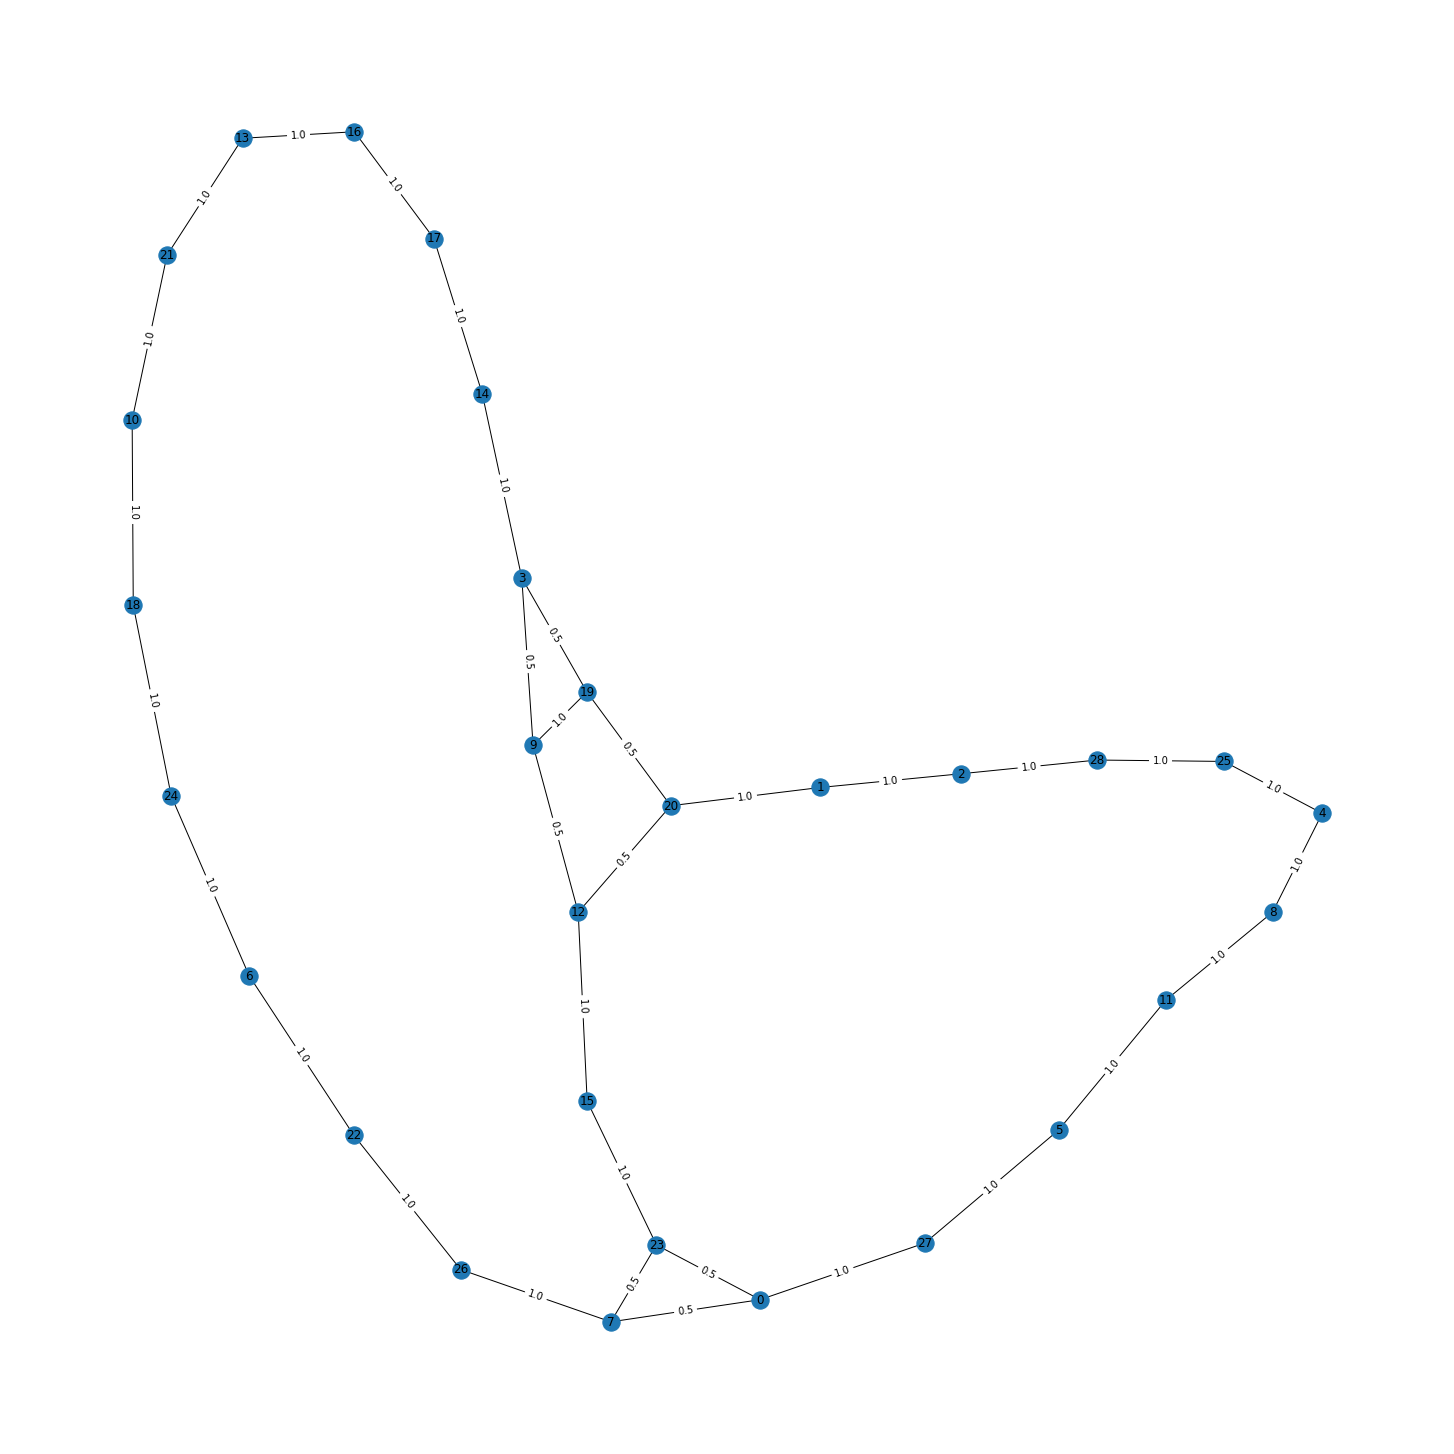

In [7]:
# Visualize the solution
soln_edges = [ e for e in xval_sparse.keys() ]
G_soln = G.edge_subgraph(soln_edges)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20)) 

pos = nx.spring_layout(G_soln)
draw_nodes = nx.draw( G_soln, pos=pos, with_labels=True )
draw_edges = nx.draw_networkx_edge_labels( G_soln, pos=pos, edge_labels=xval_sparse ) 